In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [3]:
# Read in the example catalog 
#catalog = pd.read_csv(r"C:\Users\Matthew Salinas\Matthew Salinas\Yihe (2)\Yihe\Yihe\SOULTZ_1993\SSFS 1993 10k.csv")
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/Yihe/SOULTZ_1993/ssfs1993 cat.csv')

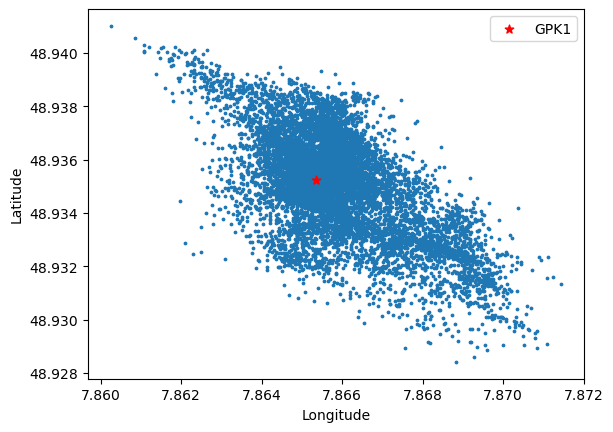

In [4]:
plt.scatter(catalog["Long"],catalog["Lat"],s=3)
GPK1= [7.86535117,48.93525543]
plt.scatter(GPK1[0],GPK1[1],s=40,marker='*',c='r',label='GPK1')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

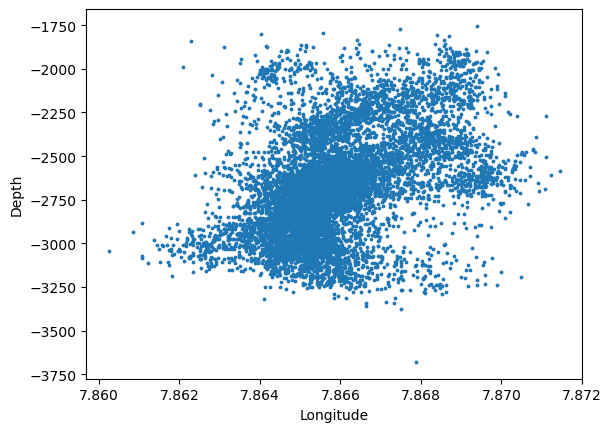

In [5]:
plt.scatter(catalog["Long"],catalog["Elevation"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.show()

In [5]:
# IGNORE THIS

shiftb=[0,0,0]
shift=[0,0,0]
shifta=[0,0,0]
flag=[False,False]
# 11.06 and 11.287 15.13360903
for i in range(len(catalog["Time"])):
    if catalog["Time"][i]>11.05 and flag[0]==False:
        shift[0]=i-1
        shiftb[2]=i-1
        flag[0]=True
        
    if catalog["Time"][i]>11.29 and flag[1]==False:
        shift[2]=i-1
        shifta[0]=i-1
        flag[1]=True
        
shiftb[0]=shift[2]-300
shifta[2]=shift[0]+300
befM = catalog["Mw"][shiftb[0]:shiftb[2]]
durM = catalog["Mw"][shift[0]:shift[2]]
aftM = catalog["Mw"][shifta[0]:shifta[2]]
avgb = np.mean(befM)
avgd = np.mean(durM)
avga = np.mean(aftM)
medb = np.median(befM)
medd = np.median(durM)
meda = np.median(aftM)
print(avgb,avgd,avga)
print(medb,medd,meda)
print(np.mean([1.56,1.48]))
print(1.52-0.68)

MwEdit = np.array(catalog["Mw"])
for i in range(shift[0],shift[2]+1):
    if MwEdit[i]>-1.5:
        MwEdit[i]-=0.84

-1.5179333333333334 nan nan
-1.57 nan nan
1.52
0.84


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [6]:
injRt = pd.read_csv(r"C:\Users\Matthew Salinas\Matthew Salinas\Yihe (2)\Yihe\Yihe\SOULTZ_1993\Injection Rate.csv")
print(injRt['Time da2'][0])
# -1.198290972 is injRt['Timeda2'][0]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Matthew Salinas\\Matthew Salinas\\Yihe (2)\\Yihe\\Yihe\\SOULTZ_1993\\Injection Rate.csv'

In [6]:
# 728173.4014 Start Time or timeda2 0

MwE2 =[]
MwEInj=[]
TE2=[]
TEInj=[]
#dstE2=[]
#dstInj=[]
for i in range(len(catalog["Mw"])):
    if catalog['TimeR'][i]<11.06 or catalog['TimeR'][i]>11.287:
        MwE2.append(catalog['Mw'][i])
        TE2.append(catalog['TimeR'][i])
        #dstE2.append(dist[i])
        if catalog['TimeR'][i] < 15.13360903:
            MwEInj.append(catalog['Mw'][i])
            TEInj.append(catalog['TimeR'][i])
            #dstInj.append(dist[i])

In [7]:
injSt = -1.198290972 #injRt['Time da2'][0]
injEnd = 15.13360903- injSt
print(injEnd)

dt = np.array(catalog['TimeR'].copy())-injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['Mw'], catalog['X'], catalog['Y'], catalog['Z'])
    if injSt-injSt <= d <= injEnd and (d<(11.06-injSt) or d>(11.287-injSt))
])
print(len(magF),len(dt))

16.331900002
10080 10743


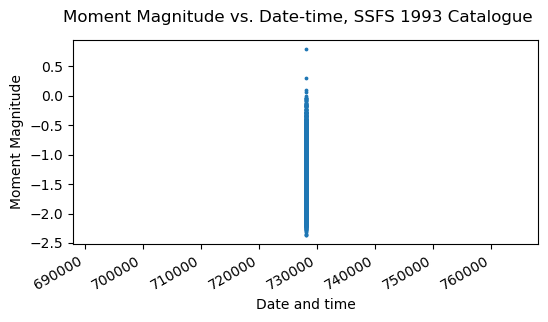

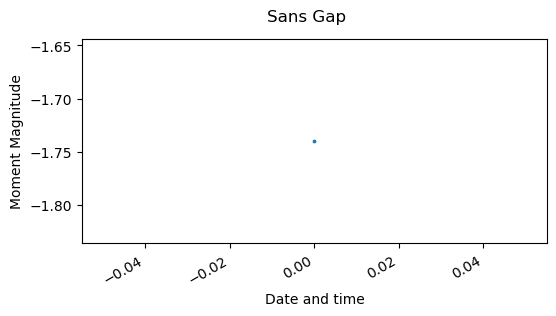

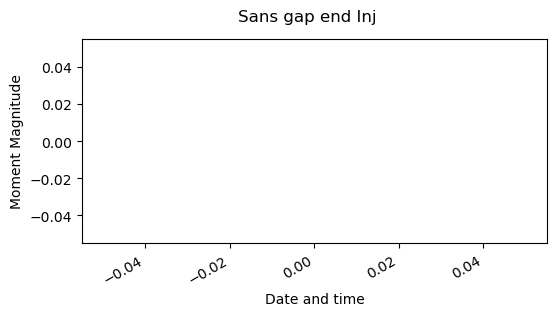

In [9]:


figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(catalog["Time"],MwEdit,s=3)
figure.suptitle("Moment Magnitude vs. Date-time, SSFS 1993 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(TE2,MwE2,s=3)
figure.suptitle("Sans Gap")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(TEInj,MwEInj,s=3)
figure.suptitle("Sans gap end Inj")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

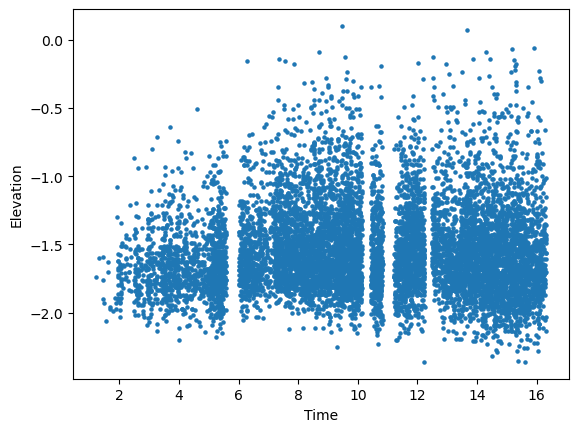

In [8]:
plt.scatter(dtF,magF,s=5)
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.show()

In [9]:
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

56.5 -126.0 2943.0


In [10]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

ValueError: x and y must be the same size

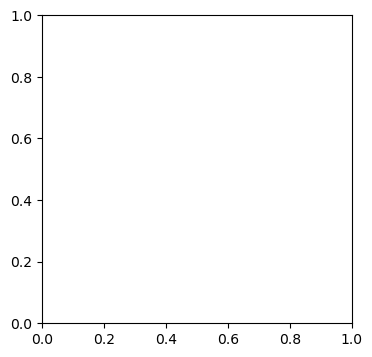

In [13]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(catalog["Time"],dist,s=0.5,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
plt.show()

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(TE2,dstE2,s=0.5,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
plt.show()

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(TEInj,dstInj,s=0.5,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
plt.show()

In [12]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)
    
dcE2 = dstE2.copy()
dcE2Ref=[]
for i in range(len(dcE2)):
    dcE2Ref.append(i)
    
dcInj = dstInj.copy()
dcInjRef=[]
for i in range(len(dcInj)):
    dcInjRef.append(i)

NameError: name 'dstE2' is not defined

In [11]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [15]:
quicksort_with_swaps(dstc,dstRef , 0, len(dstc) - 1)

quicksort_with_swaps(dcE2,dcE2Ref , 0, len(dcE2) - 1)
quicksort_with_swaps(dcInj,dcInjRef , 0, len(dcInj) - 1)

NameError: name 'dstc' is not defined

In [16]:
rDivs=[[] for i in range(4)]
rDmaxRad=[]
count=0
rpl=0
for i in range(len(dstc)):
    if count <3300:
        rDivs[rpl].append(dstRef[i])
        count +=1
    if count ==3300:
        count = 0
        rpl+=1
        rDmaxRad.append(dstc[i])
rDmaxRad.append(dstc[i])

NameError: name 'dstc' is not defined

In [17]:
print(rDmaxRad)

[]


In [12]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [13]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

# Example usage:
my_array = [3, 6, 8, 10, 1, 2, 1]
sorted_array = quicksort(my_array)
print(sorted_array)

[1, 1, 2, 3, 6, 8, 10]


In [1]:
sDivs=[[] for i in range(4)]
for i in range(4):
    sDivs[i]=quicksort(rDivs[i])

NameError: name 'quicksort' is not defined

In [19]:
# Create a time series to calculate for b-value through time. To start with, use 300 events for b-val calculation
bValT =[]
tStamp =[]
bpValT=[]
mcCol=[]
low_b_list= []
high_b_list= []
std_list = []

low_bp_list=[]
high_bp_list=[]
stdp_list=[]

magMax=[]
magD=[]

tester= True
inc = 300

while inc <=len(MwEdit):
    magt=[]
    mx=-10
    md=0
    
    for y in range(inc-300,inc):
        magt.append(MwEdit[y])
        if magt[len(magt)-1]>=mx:
            mx=magt[len(magt)-1]
            md=catalog["Time"][y]           
    magMax.append(mx)
    magD.append(md)
    magT = np.array(magt)
    b, Mc, hist = b_value_functions.btrad(magT, bins, delta_b = 0.01)
    bValT.append(b)
    mcCol.append(Mc)
    hist1, bP = b_value_functions.bpos(magT)
    bpValT.append(bP)
    #date time conversion
    
    
    tStamp.append(catalog["Time"][inc])
    #print(tStamp[-1])
    low_b, high_b, std = b_value_functions.bootstrap(magT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)
    low_b_list.append(low_b)
    high_b_list.append(high_b)
    std_list.append(std)
    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(magT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    low_bp_list.append(low_bp)
    high_bp_list.append(high_bp)
    stdp_list.append(stdp)
    inc=inc+20

KeyboardInterrupt: 

In [ ]:
plt.scatter(catalog["Time"],MwEdit,s=5)
plt.xlabel("Time")
plt.ylabel("Mw")
#plt.xlim(10,13)
plt.show()

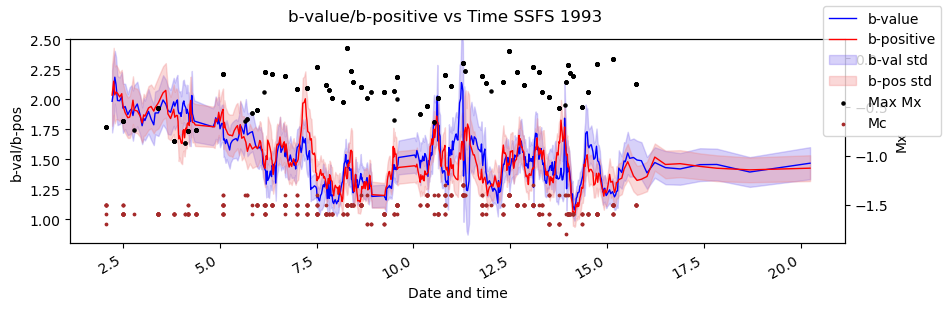

In [21]:
# November into December
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=1,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.scatter(magD,magMax,s=5,label='Max Mx',color='k')
ax2.scatter(magD,mcCol,s=3,label='Mc',color = "brown")

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time SSFS 1993")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('Mx')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.8,2.5])
#ax1.set_xlim([datetime(2006,12,7),datetime(2006,12,9)])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

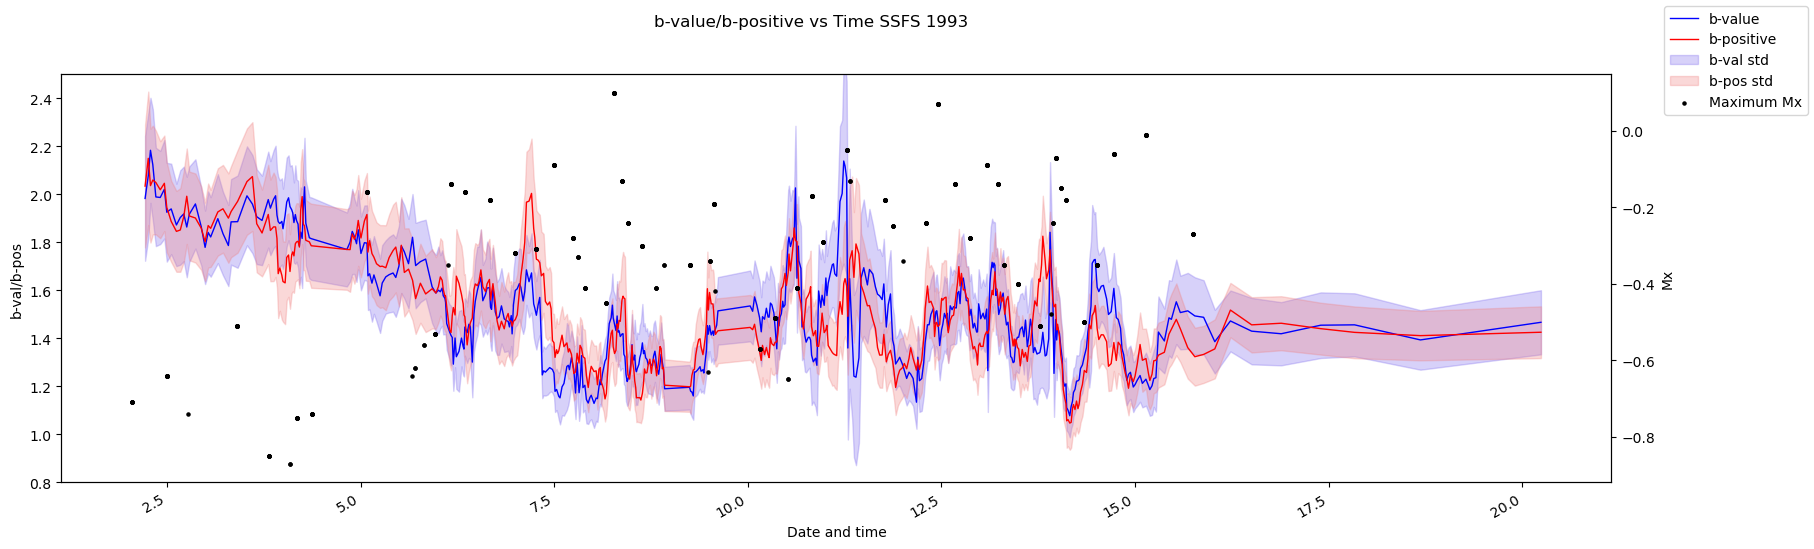

In [22]:
# November into December
fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=1,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.scatter(magD,magMax,s=5,label='Maximum Mx',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time SSFS 1993")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('Mx')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.8,2.5])
#ax1.set_xlim([datetime(2006,12,7),datetime(2006,12,9)])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

In [97]:
import csv
from pandas import DataFrame
data = [bValT,tStamp,bpValT,mcCol,low_b_list,high_b_list,std_list,low_bp_list,high_bp_list,stdp_list,magMax,magD]

relev = {'bvalT': bValT, 'tStamp':tStamp,'bpValT':bpValT,'mcCol':mcCol,'low_b_list':low_b_list,'high_b_list':high_b_list,
     'std_list':std_list,'low_bp_list':low_bp_list,'high_bp_list':high_bp_list,'stdp_list':stdp_list,'magMax':magMax,
     'magD':magD}
df=DataFrame(relev)
#print(df)
df.to_csv(r"C:\Users\mattp\Documents\SSFS1993 rec.csv")

In [ ]:
 import math


def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

def round_decimals_up(number:float, decimals:int=2):
    """
    Returns a value rounded up to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor

In [24]:
br=[[] for i in range(4)]
bpr=[[] for i in range(4)]
dtr=[[] for i in range(4)]
lbr=[[] for i in range(4)]
hbr=[[] for i in range(4)]
stdr=[[] for i in range(4)]
lbpr=[[] for i in range(4)]
hbpr=[[] for i in range(4)]
stdpr=[[] for i in range(4)]
mxmr=[[] for i in range(4)]
mxdr=[[] for i in range(4)]
mcr=[[] for i in range (4)]

for i in range(4):
    print(i)
    for x in range(300,len(sDivs[i]),20):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(MwEdit[sDivs[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=catalog["Time"][sDivs[i][j]]
        mxT=np.array(mxt)
        mxmr[i].append(mxm)
        mxdr[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br[i].append(b)
        dtr[i].append(catalog["Time"][sDivs[i][x]])
        bpr[i].append(bP)
        lbr[i].append(low_b)
        lbpr[i].append(low_bp)
        hbr[i].append(high_b)
        hbpr[i].append(high_bp)
        stdr[i].append(std)
        stdpr[i].append(stdp)
        mcr[i].append(Mc)
        

0
1
2
3


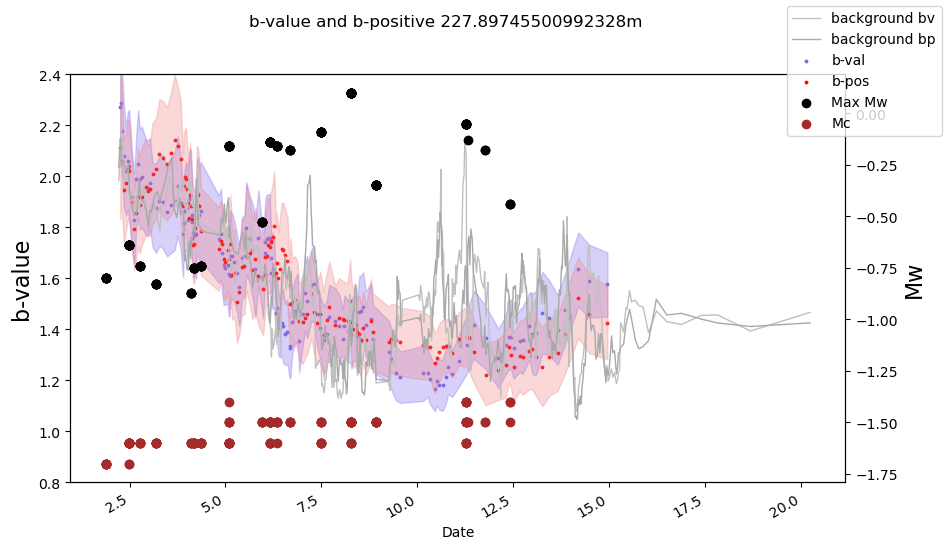

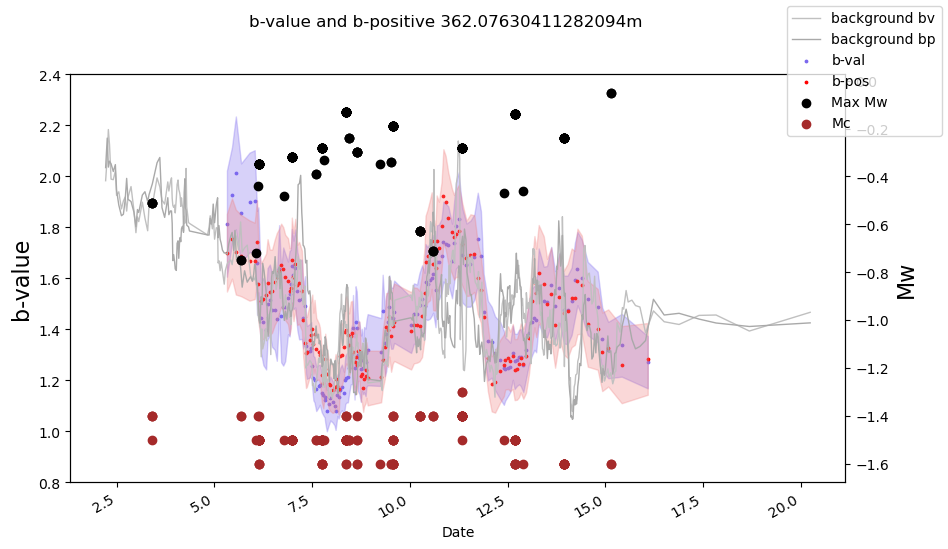

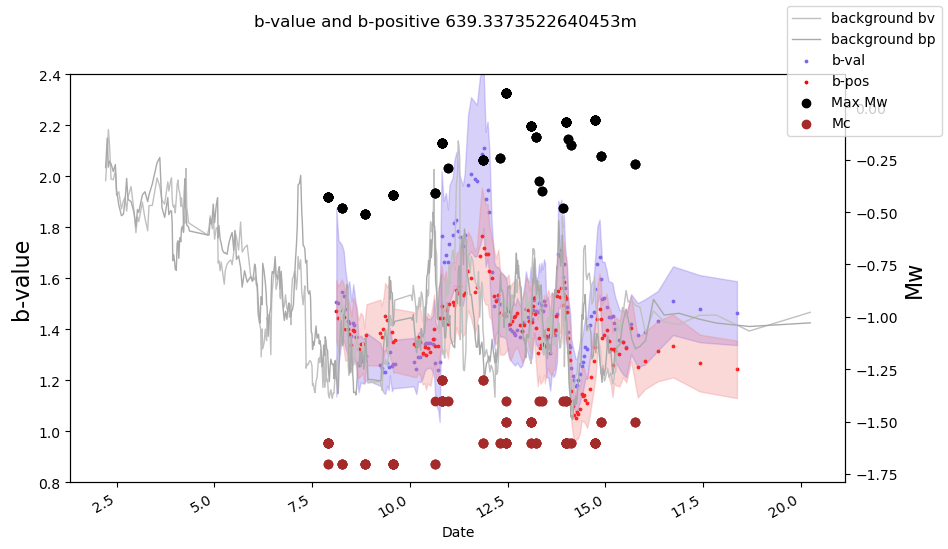

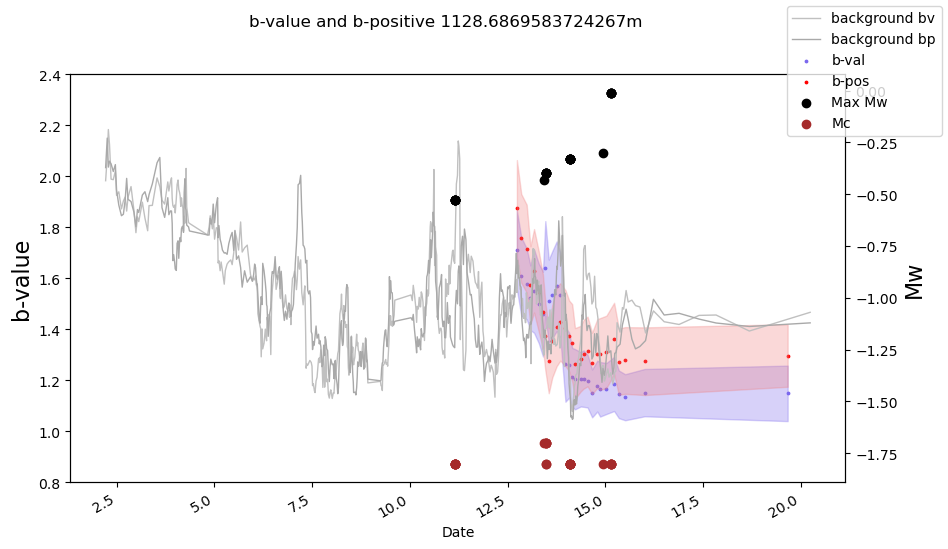

In [25]:
for i in range(4):
    fig, ax = plt.subplots(figsize=(10,6))
    ax2 = ax.twinx()

    fig.suptitle("b-value and b-positive " + str(rDmaxRad[i]) + "m")
    #first plot
    #ax = fig.add_subplot(gs[0])
    ax.plot(tStamp,bValT,linewidth=1,label='background bv', color ="silver")
    ax.plot(tStamp,bpValT,linewidth=1,label='background bp', color ="darkgray")
    ax.scatter(dtr[i], br[i], label = 'b-val', color = 'mediumslateblue',s=3)
    ax.fill_between(dtr[i], np.subtract(br[i],stdr[i]), np.add(br[i],stdr[i]), alpha = 0.3, color = 'mediumslateblue')


    ax.scatter(dtr[i], bpr[i],label = 'b-pos', color = 'red',s=3)
    ax.fill_between(dtr[i], np.subtract(bpr[i],stdpr[i]), np.add(bpr[i],stdpr[i]), alpha = 0.3, color = 'lightcoral')
    ax2.scatter(mxdr[i],mxmr[i],label="Max Mw",color='black')
    ax2.scatter(mxdr[i],mcr[i],label="Mc",color="brown")
    ax2.set_ylabel('Mw',size=16)

    ax.set_ylim([0.8,2.4])
    #ax.set_xlim([datetime(2006,12,3),datetime(2006,12,15)])
    ax.set_ylabel(r'b-value', size =16)
    ax.set_xlabel('Date')
    fig.autofmt_xdate()
    fig.legend(loc = 'upper right')
    #plt.savefig("bp bv "+str(int(rDmaxRad[i]))+" SSFS1993 higher divs2.png")

In [31]:
# Wellhead Pressure + Injection Rate 
press = pd.read_csv("D:\Yihe\Yihe\SOULTZ_1993\Wellhead Pressure.csv")
injRt = pd.read_csv("D:\Yihe\Yihe\SOULTZ_1993\Injection Rate.csv")

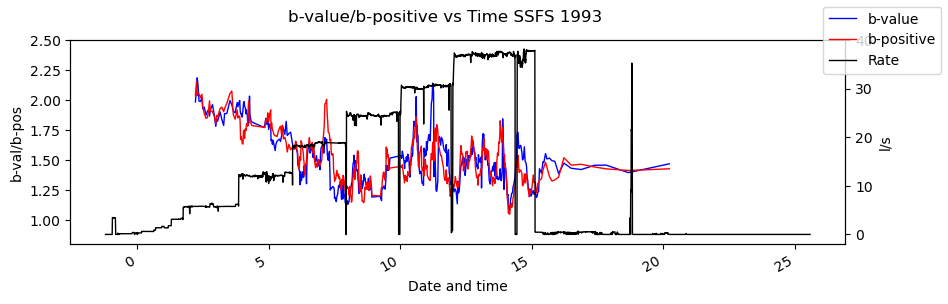

In [27]:
# November into December
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=1,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
#ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.plot(injRt["Time da2"],injRt["Injection Rate"],linewidth=1,label='Rate',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time SSFS 1993")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('l/s')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.8,2.5])
#ax1.set_xlim([datetime(2006,12,7),datetime(2006,12,9)])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

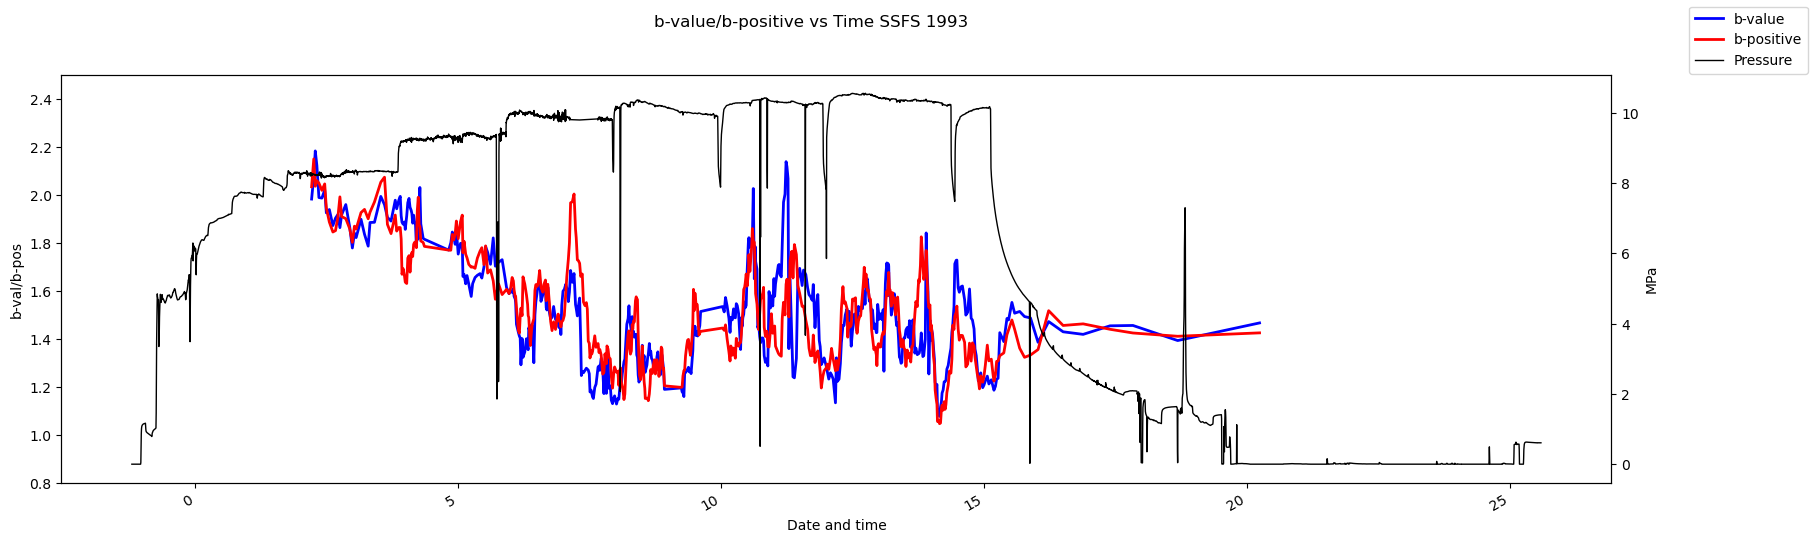

In [28]:
# November into December
fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=2,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=2,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
#ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.plot(press["Time da2"],press["Pressure"],linewidth=1,label='Pressure',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time SSFS 1993")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('MPa')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.8,2.5])
#ax1.set_xlim([datetime(2006,12,7),datetime(2006,12,9)])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

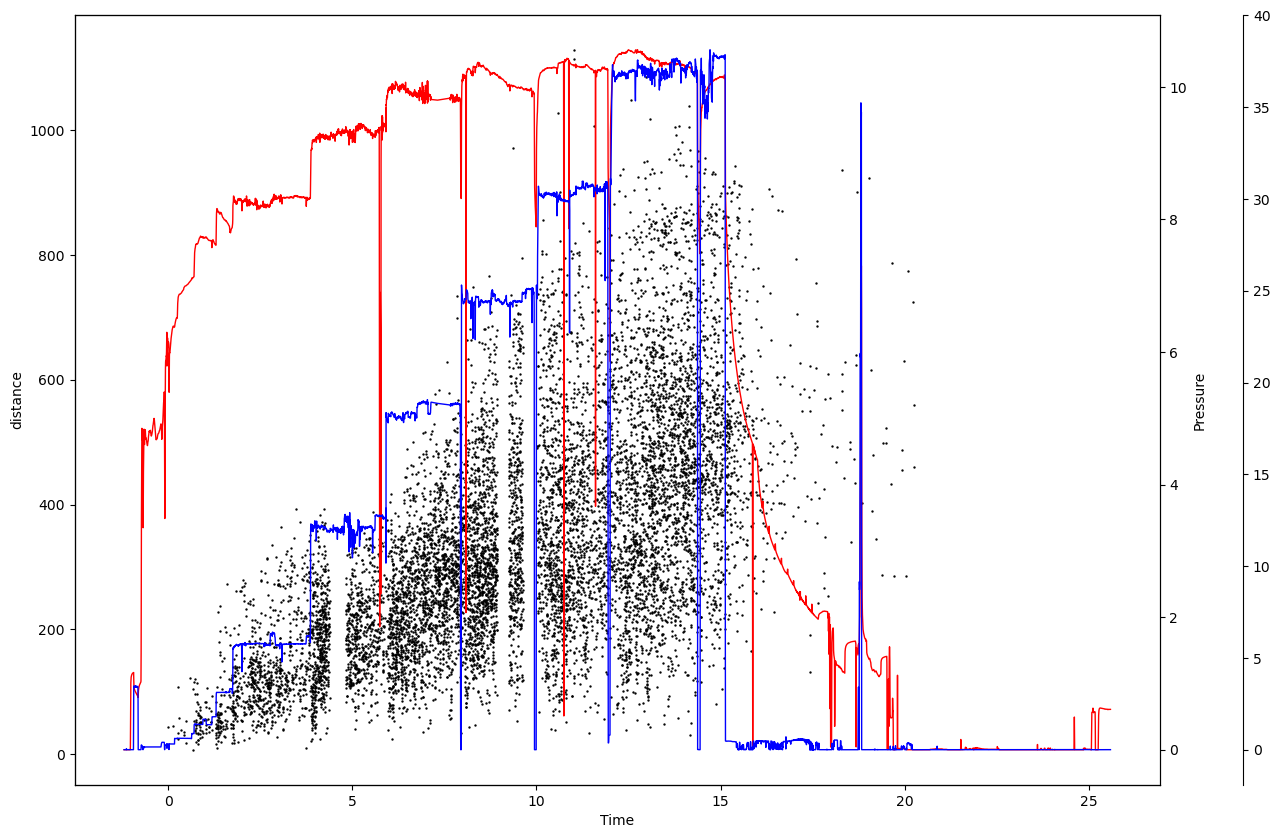

In [29]:
fig, ax1 = plt.subplots(figsize=(14,10))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.scatter(catalog["Time"],dist,s=0.5,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
ax2.plot(press["Time da2"],press["Pressure"],linewidth=1,label='Pressure',color='r')
ax2.set_ylabel("Pressure")
ax3.plot(injRt["Time da2"],injRt["Injection Rate"],linewidth=1,label='Rate',color='b')

ax3.spines['right'].set_position(('outward', 60))
plt.show()

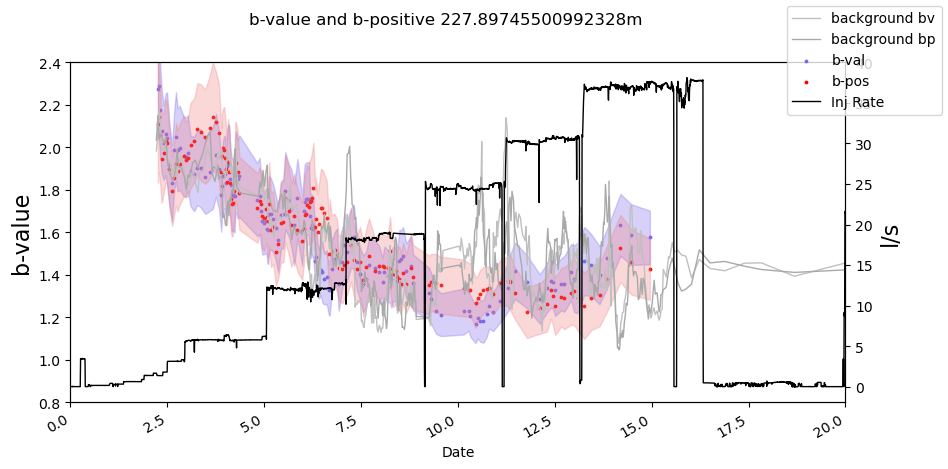

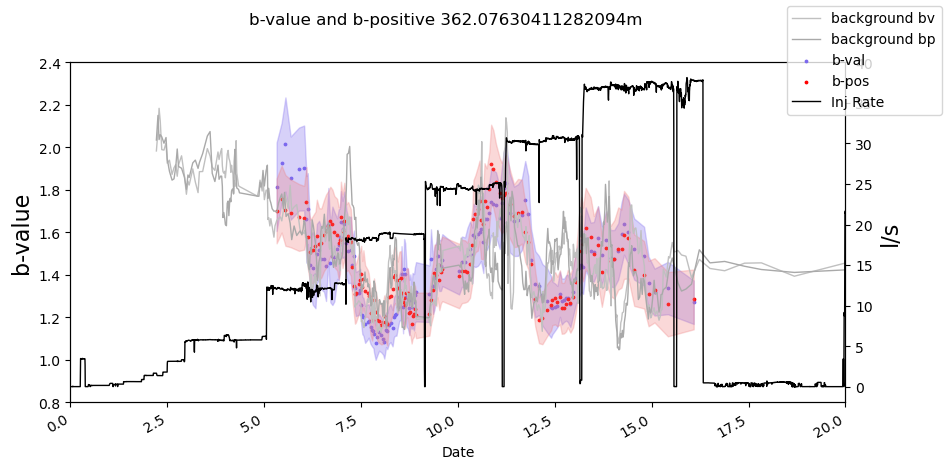

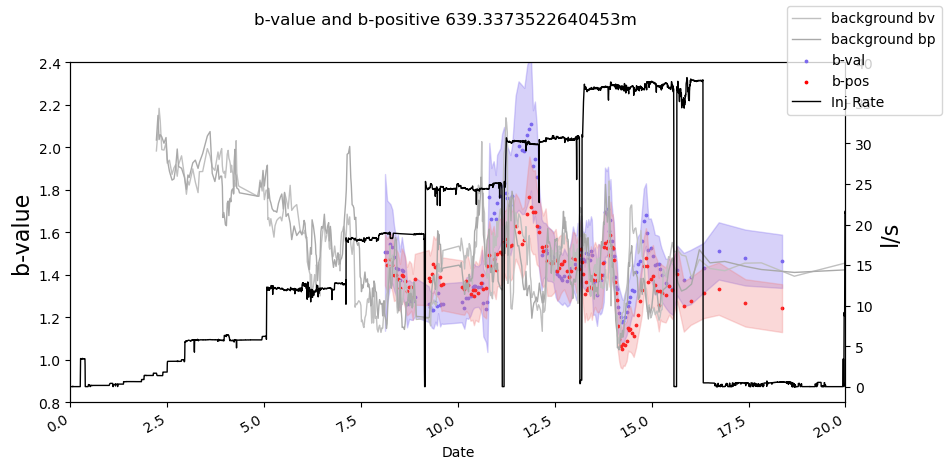

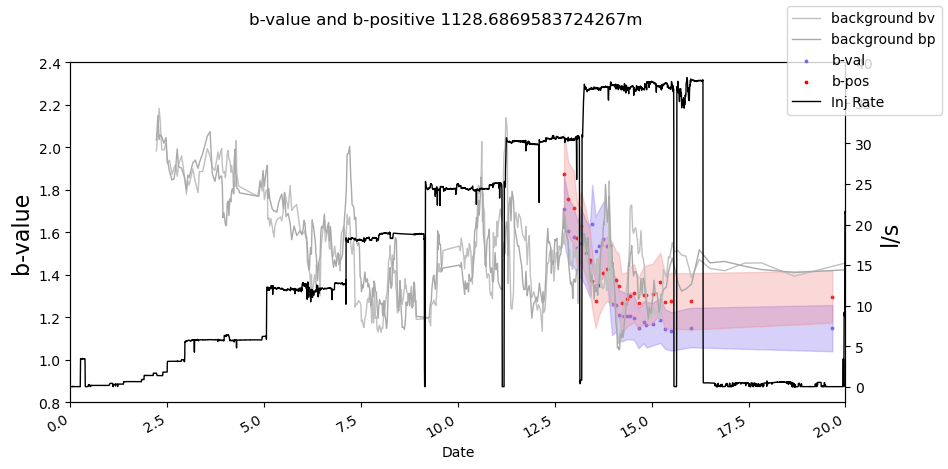

In [30]:
for i in range(4):
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()

    fig.suptitle("b-value and b-positive " + str(rDmaxRad[i]) + "m")
    #first plot
    #ax = fig.add_subplot(gs[0])
    ax.plot(tStamp,bValT,linewidth=1,label='background bv', color ="silver")
    ax.plot(tStamp,bpValT,linewidth=1,label='background bp', color ="darkgray")
    ax.scatter(dtr[i], br[i], label = 'b-val', color = 'mediumslateblue',s=3)
    ax.fill_between(dtr[i], np.subtract(br[i],stdr[i]), np.add(br[i],stdr[i]), alpha = 0.3, color = 'mediumslateblue')


    ax.scatter(dtr[i], bpr[i],label = 'b-pos', color = 'red',s=3)
    ax.fill_between(dtr[i], np.subtract(bpr[i],stdpr[i]), np.add(bpr[i],stdpr[i]), alpha = 0.3, color = 'lightcoral')
    ax2.plot(injRt["Time da"],injRt["Injection Rate"],linewidth=1,label="Inj Rate",color='black')
    ax2.set_ylabel('l/s',size=16)

    ax.set_ylim([0.8,2.4])
    ax.set_xlim([0,20])
    ax.set_ylabel(r'b-value', size =16)
    ax.set_xlabel('Date')
    fig.autofmt_xdate()
    fig.legend(loc = 'upper right')
    #plt.savefig("bp bv "+str(int(rDmaxRad[i]))+" SSFS1993 higher divs2.png")

In [14]:
####  Drif corrections
## Vars: MwE2, dstE2, TE2, dcE2, MwEInj, dstInj, TEInj
# M0 = 10.^(1.72*mag0+11.04);
# mag0=(2/3)*log10(M0)-6.1; 

MwE2=np.array(magF)
M0 = np.power(10,1.72*MwE2+11.04)
MwEN = 2/3.0 * np.log10(M0)-6.1


[]

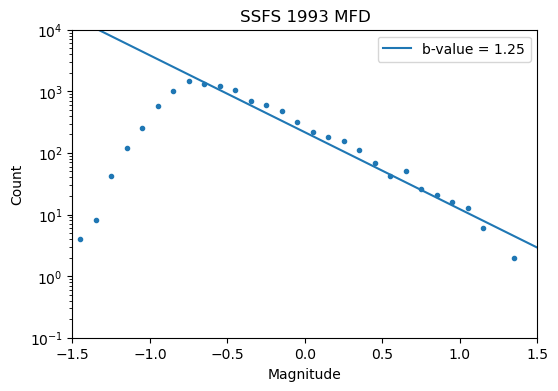

In [15]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(MwEN, bins, delta_b = 0.01)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 1993 MFD')
plt.plot()

In [16]:
hist1, bP = b_value_functions.bpos(MwEN)
print(len(hist1[0]))
print(len(hist1[1]))
print(bP)

22
23
1.2540948165519934


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2] 749


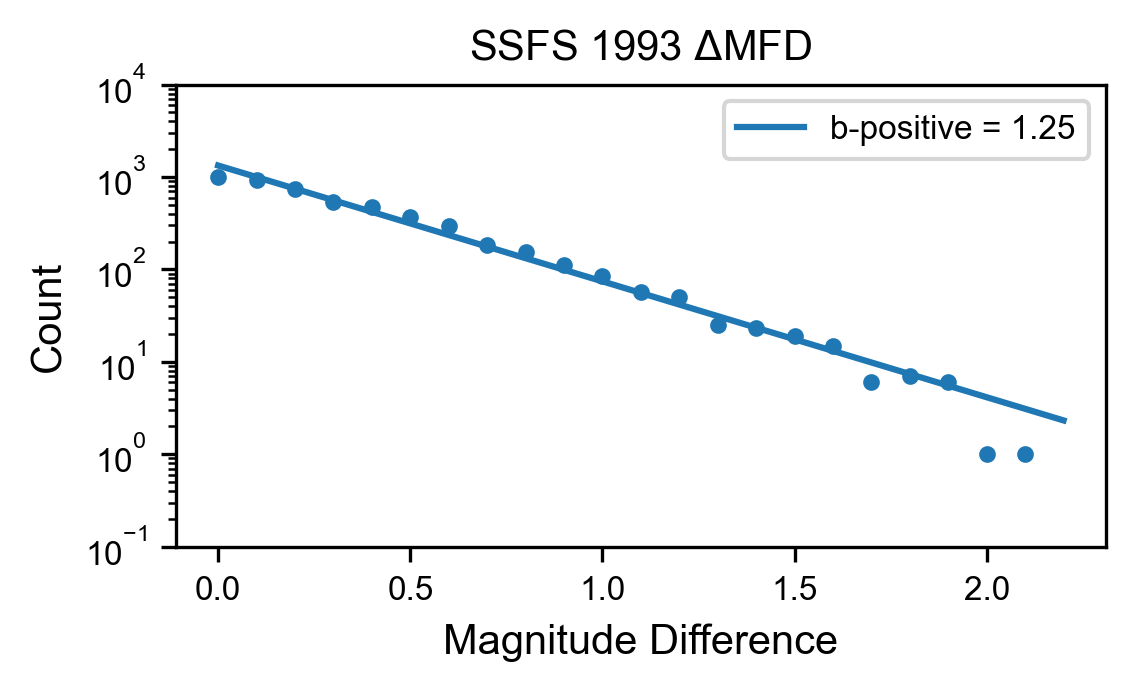

In [47]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MwEN)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [24]:
#make copy of distance array and an array referencing distance copy
dstc2 = dist.copy()
dstRef2=[]
for i in range(len(dstc2)):
    dstRef2.append(i)

In [43]:
print(len(dstc2))
print(len(dstRef2))



10080
10080


In [42]:
# sort distance array and sort reference array along with
quicksort_with_swaps(dstc2,dstRef2 , 0, len(dstc2) - 1)

In [27]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc2)):
    if count <5040:
        rDivs2[rpl].append(dstRef2[i])
        count +=1
    if count ==5040:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc2[i])
        

# quicksort_with_swaps(dcE2,dcE2Ref , 0, len(dcE2) - 1)
# quicksort_with_swaps(dcInj,dcInjRef , 0, len(dcInj) - 1)  



In [28]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])



In [29]:

rDmaxRad2.append(dstc2[len(dstc2)-1])
print(rDmaxRad2)


[np.float64(294.33866548586514), np.float64(1128.6869583724267), np.float64(1128.6869583724267)]


In [30]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]



# MwEN, MwInjN

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(MwEN[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        

0
1


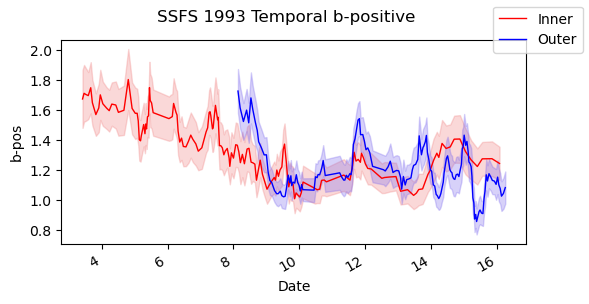

In [31]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 1993 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

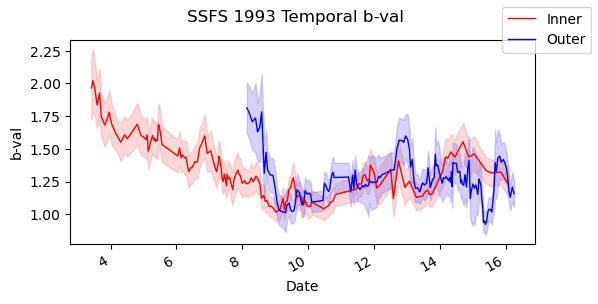

In [32]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 1993 Temporal b-val")
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-val')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

15.13360903


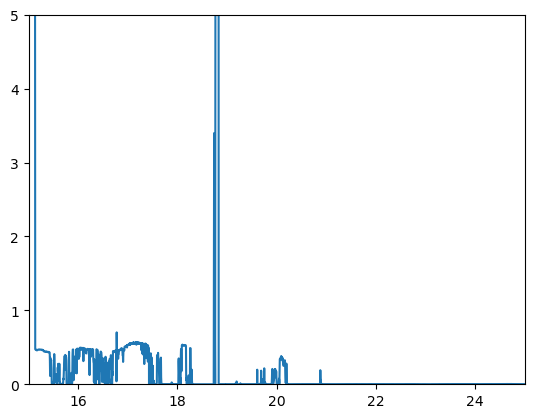

In [35]:
# ax2.plot(injRt["Time da2"],injRt["Injection Rate"],linewidth=1,label='Rate',color='k')
plt.plot(injRt['Time da2'],injRt['Injection Rate'])
# call the end of injection after 15?
plt.ylim(0,5)
plt.xlim(15,25)

# first drop below 1 after day 15
injEnd = 0
truther = True
ct=0
while truther:
    if injRt['Time da2'][ct]>15:
        if injRt['Injection Rate'][ct]<1:
            injEnd = injRt['Time da2'][ct]
            truther = False
    ct+=1
print(injEnd)

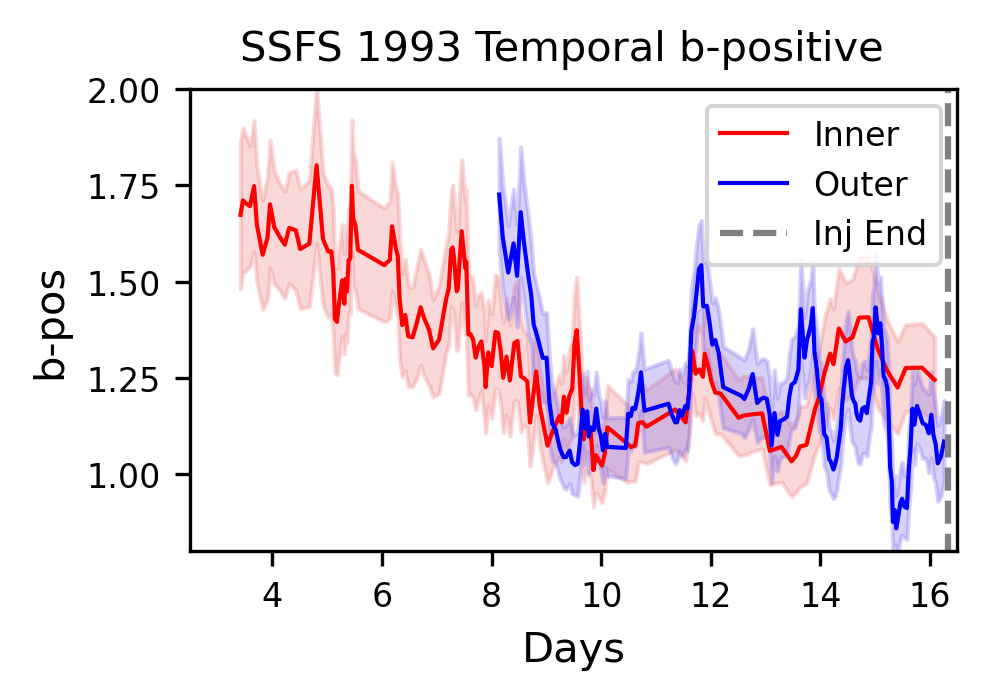

In [33]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993.png",bbox_inches='tight', pad_inches=0.05)

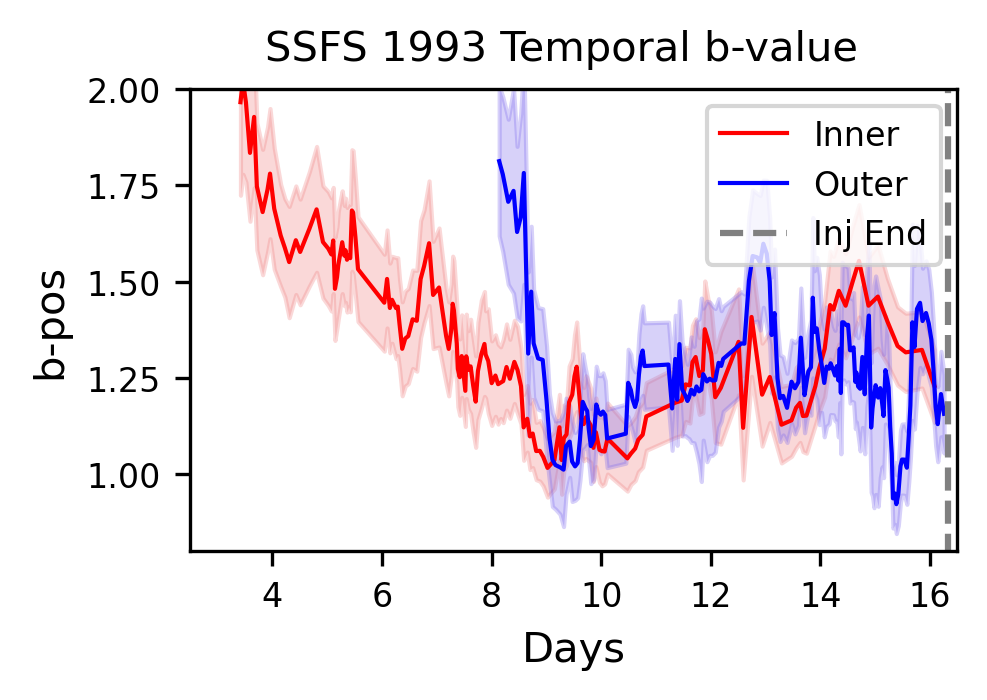

In [34]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993.png",bbox_inches='tight', pad_inches=0.05)

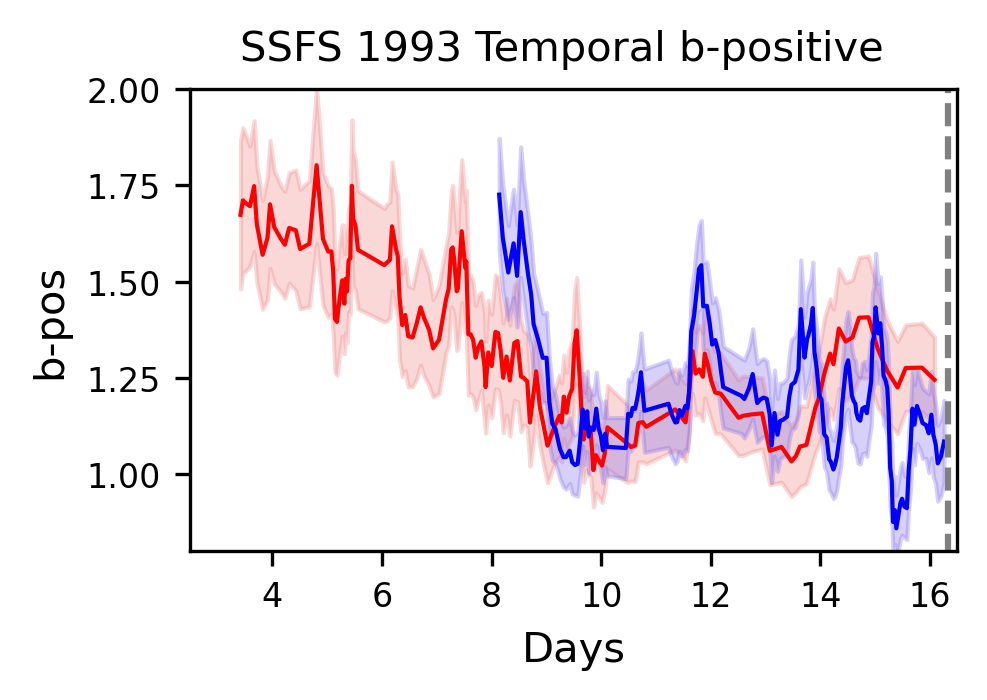

In [35]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("SSFS 1993 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,2.5,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([2.5,16.5])
ax1.set_ylim([0.8,2.0])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(4, 16, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\ssfs1993 sansLgnd corrected.png",bbox_inches='tight', pad_inches=0.05)

In [36]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if MwEN[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=MwEN[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if MwEN[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=MwEN[sDivs2[1][i]]

print(ioMax)

[np.float64(1.3746666666666663), np.float64(1.3402666666666665)]


In [37]:
print(rDmaxRad2[0]/rDmaxRad2[1])

0.26077971691132434


1.315819939677888 1.1897125567882758


[]

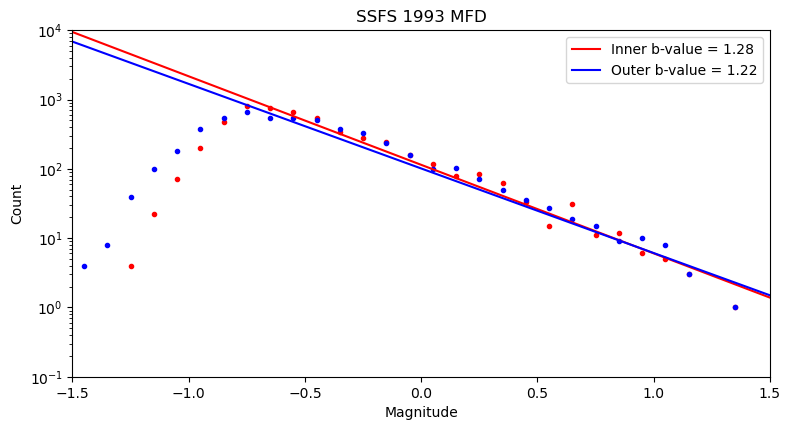

In [38]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MwEN[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MwEN[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

1.315819939677888 1.1897125567882758


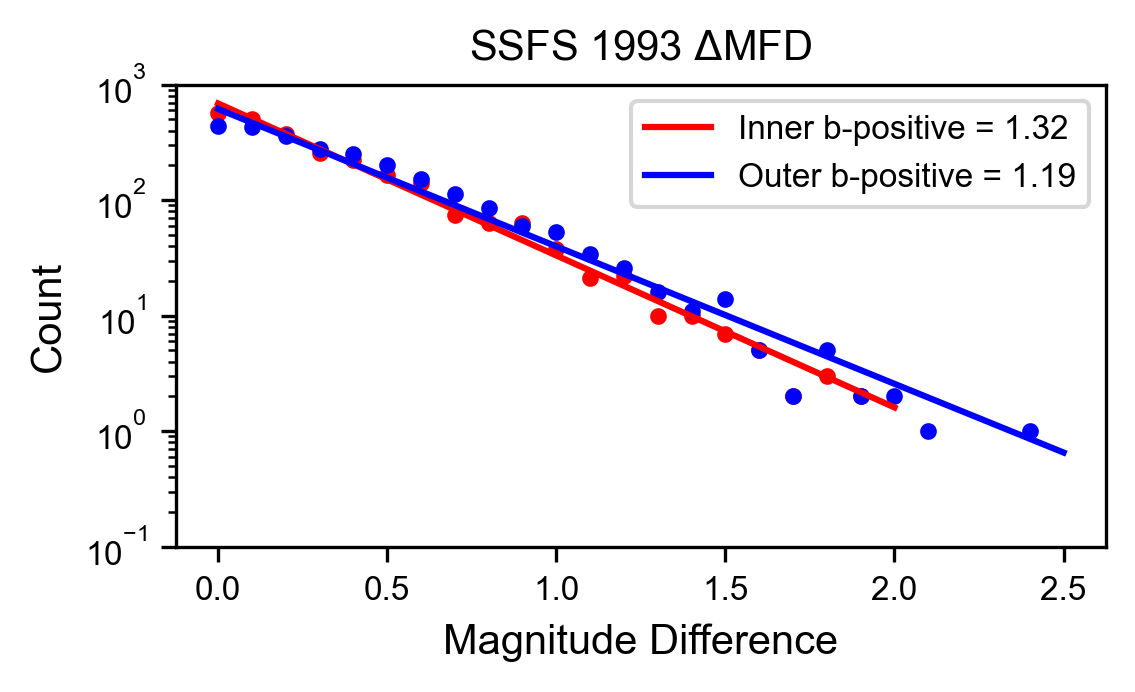

In [46]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MwEN[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MwEN[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('SSFS 1993 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/SSFS1993 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [53]:
mmdi=[]
mmmi=[]
for x in range(len(sDivs2[0])):
    mmdi.append(catalog["Time"][sDivs2[0][x]])
    mmmi.append(MwEdit[sDivs2[0][x]])
    
mmdo=[]
mmmo=[]
for x in range(len(sDivs2[1])):
    mmdo.append(catalog["Time"][sDivs2[1][x]])
    mmmo.append(MwEdit[sDivs2[1][x]])

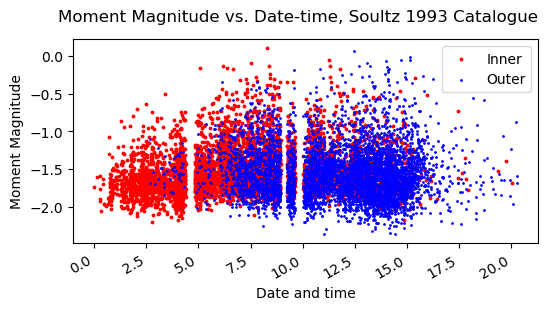

In [56]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(mmdi,mmmi,s=3,color='r',label='Inner')
ax1.scatter(mmdo,mmmo,s=1,color='b',label='Outer')
figure.suptitle("Moment Magnitude vs. Date-time, Soultz 1993 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
ax1.legend(loc = 'upper right')
figure.autofmt_xdate()
plt.show()

In [63]:
ilon=[]
olon=[]
ilat=[]
idep=[]
olat=[]
odep=[]
idist=[]
odist=[]

for i in range(len(sDivs2[0])):
    ilon.append(catalog["Long"][sDivs2[0][i]])
    ilat.append(catalog["Lat"][sDivs2[0][i]])
    idep.append(catalog["Elevation"][sDivs2[0][i]])
    idist.append(dist[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    olon.append(catalog["Long"][sDivs2[1][i]])
    olat.append(catalog["Lat"][sDivs2[1][i]])
    odep.append(catalog["Elevation"][sDivs2[1][i]])
    odist.append(dist[sDivs2[1][i]])

In [83]:


#print(min(aldep),max(aldep))
print(min(idep),max(idep))
print(min(odep),max(odep))

-3091 -2493
-3679 -1754


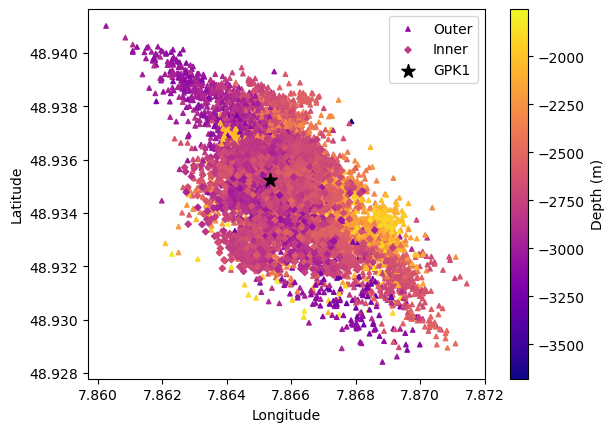

In [84]:
plt.scatter(olon,olat,marker='^',s=10,c=odep,cmap='plasma',vmin=-3679,vmax=-1754,label='Outer')
plot=plt.scatter(ilon,ilat,marker='D',s=10,c=idep,vmin=-3679,vmax=-1754,cmap='plasma',label='Inner')

plt.scatter(GPK1[0],GPK1[1],s=100,marker='*',c='k',label='GPK1')
plt.legend()
plt.colorbar(plot,label='Depth (m)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

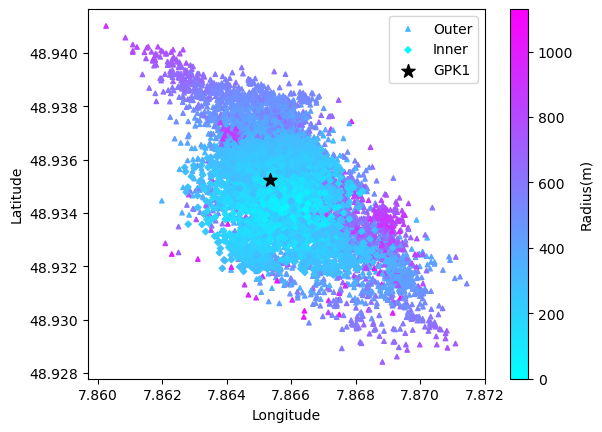

In [86]:
plt.scatter(olon,olat,marker='^',s=10,c=odist,cmap='cool',vmin=0,vmax=1130,label='Outer')
plot=plt.scatter(ilon,ilat,marker='D',s=10,c=idist,cmap='cool',vmin=0,vmax=1130,label='Inner')

plt.scatter(GPK1[0],GPK1[1],s=100,marker='*',c='k',label='GPK1')
plt.legend()
plt.colorbar(plot,label='Radius(m)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

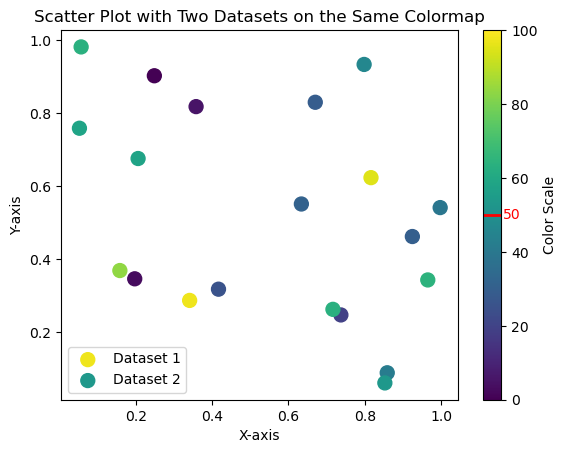

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x1 = np.random.rand(10)
y1 = np.random.rand(10)
colors1 = np.random.rand(10) * 100  # Values between 0 and 100

x2 = np.random.rand(10)
y2 = np.random.rand(10)
colors2 = np.random.rand(10) * 100  # Values between 0 and 100

# Specific value to mark on the colorbar
specific_value = 50

# Create a colormap
cmap = plt.cm.viridis

# Plotting first set of data
scatter1 = plt.scatter(x1, y1, c=colors1, cmap=cmap, vmin=0, vmax=100, s=100, label='Dataset 1')

# Plotting second set of data
scatter2 = plt.scatter(x2, y2, c=colors2, cmap=cmap, vmin=0, vmax=100, s=100, label='Dataset 2')

# Adding colorbar
cbar = plt.colorbar(scatter1)
cbar.set_label('Color Scale')

# Mark the specific value on the colorbar
cbar.ax.hlines(y=specific_value, xmin=0, xmax=1, color='red', linewidth=2)
cbar.ax.text(1.1, specific_value, f'{specific_value}', color='red', va='center')

# Adding labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Two Datasets on the Same Colormap')
plt.legend()

# Show plot
plt.show()

In [ ]:
# Divide the catalogue into 10 different sections creating a b-pos (and bv)for each

